In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from DBM_HPC import DielectricBreakdown

In [30]:
db = DielectricBreakdown(
    N=100, 
    eta=1
)

db.simulate(max_steps=1500)

Grid expanded from 100x100 to 150x150


1499

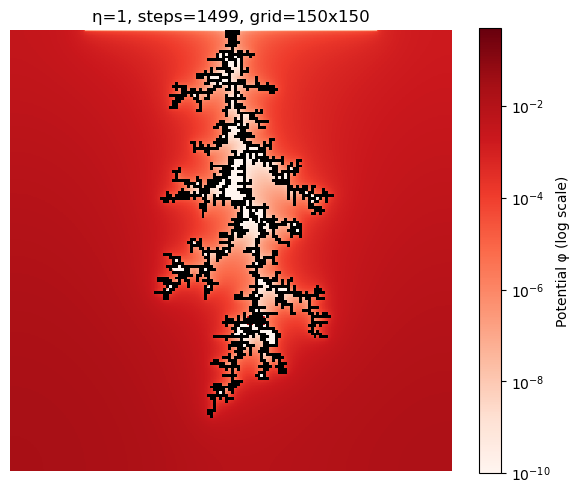

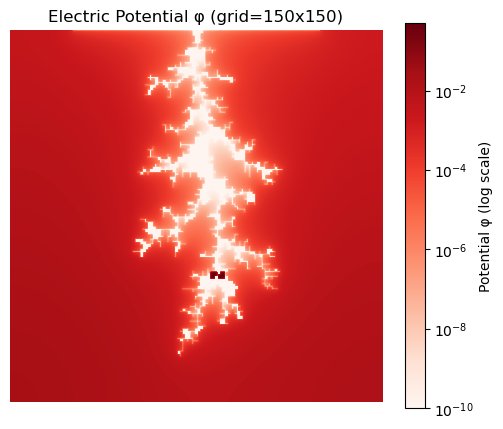

In [35]:
db.plot_overlay()
db.plot_phi()

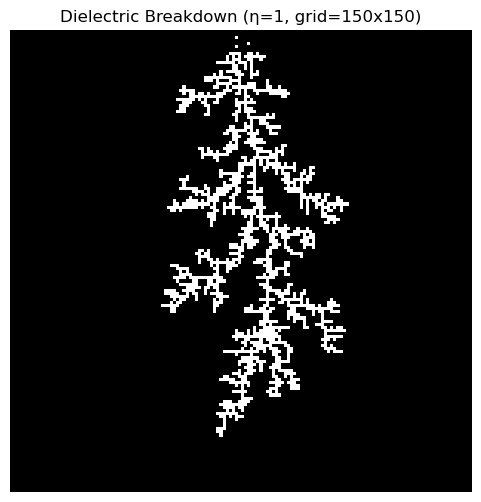

In [33]:
bd2 = DielectricBreakdown(
    N=100, 
    eta=1,
)

bd2.load_content()
bd2.plot_spark()